In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency

In [39]:
df = pd.read_csv("../anneal.data")
df_copy = pd.read_csv("../anneal.data")
df.replace("?", np.nan, inplace=True)

In [42]:
df.carbon.value_counts()

0     730
55     17
65     14
45     13
6      11
70      4
4       4
8       2
10      2
3       1
Name: carbon, dtype: int64

In [3]:
df_copy[["formability", "target"]].groupby("target").value_counts()

target  formability
1       ?                8
2       2               48
        3               23
        ?               17
3       2              290
        ?              224
        3               60
        1               25
        5                9
5       3               45
        1               15
U       ?               34
dtype: int64

In [4]:
df_condition_nan_dropped = df[df['formability'].notna()]

In [6]:
df_copy.shape, df_condition_nan_dropped.shape

((798, 39), (527, 39))

In [5]:
contigency= pd.crosstab(df_condition_nan_dropped['formability'], df_condition_nan_dropped['product_type']) 
contigency

product_type,C
formability,
1,40
2,338
3,128
5,9


0.9636040257573377


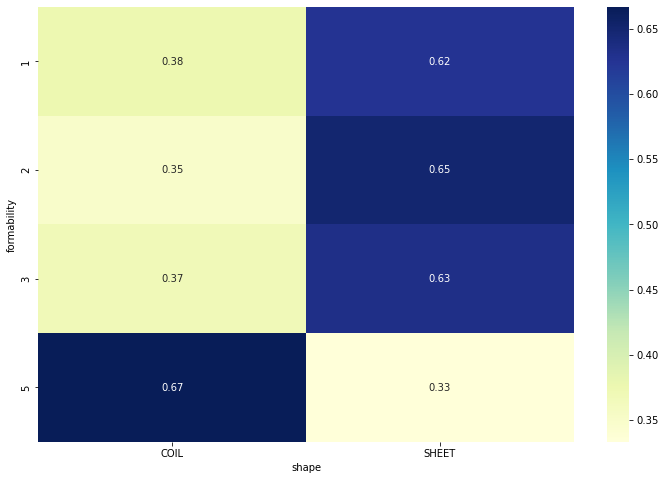

In [6]:
contigency= pd.crosstab(df_condition_nan_dropped['formability'], df_condition_nan_dropped['shape'], normalize='index')
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

c, p, dof, expected = chi2_contingency(contigency) 
# Print the p-value
print(p)

bore              0         600
formability                    
1            1.000000  0.000000
2            0.982249  0.017751
3            1.000000  0.000000
5            1.000000  0.000000
0.9967618925200682


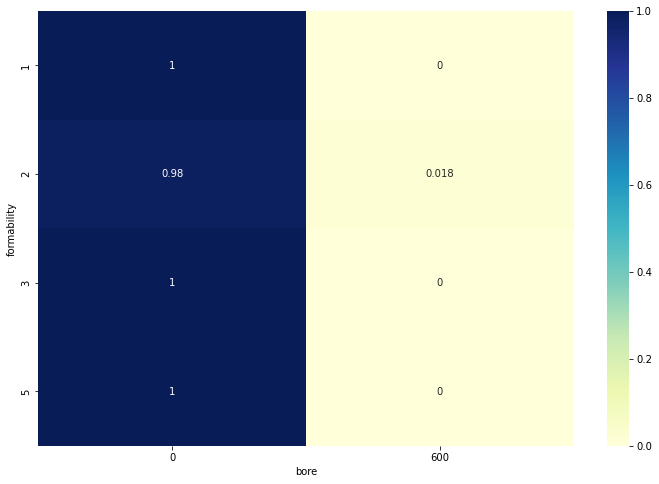

In [7]:
contigency= pd.crosstab(df_condition_nan_dropped['formability'], df_condition_nan_dropped['bore'], normalize='index')
print(contigency)
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

c, p, dof, expected = chi2_contingency(contigency) 
# Print the p-value
print(p)

In [8]:
df_copy[["bore", "formability"]].groupby("formability").value_counts()

formability  bore
1            0        40
2            0       332
             600       6
3            0       128
5            0         9
?            0       250
             600      24
             500       9
dtype: int64

In [9]:
df_condition_nan_dropped["formability"].value_counts()

2    338
3    128
1     40
5      9
Name: formability, dtype: int64

<AxesSubplot:xlabel='carbon'>

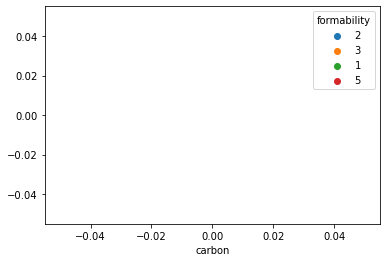

In [43]:
sns.scatterplot(data=df, x="carbon", hue="formability")

In [35]:
df_condition_nan_dropped[["carbon", "formability"]]

,carbon,formability
1,0,2
2,0,2
6,0,2
7,0,2
8,0,2
...,...,...
792,0,2
794,0,1
795,0,2
796,0,2


In [38]:
df_condition_nan_dropped.strength.value_counts()

0    515
Name: strength, dtype: int64

<AxesSubplot:xlabel='carbon', ylabel='Probability'>

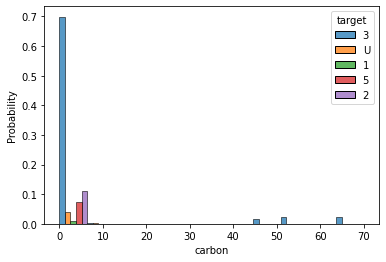

In [49]:
sns.histplot(data=df, x="carbon", hue="target", stat='probability', multiple="dodge")

In [48]:
df.hardness.value_counts()

0     640
45     53
50     31
85     30
60     23
70     17
80      4
Name: hardness, dtype: int64

<AxesSubplot:xlabel='formability', ylabel='Probability'>

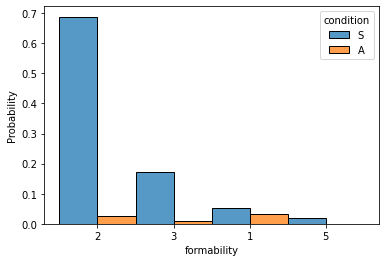

In [19]:
sns.histplot(data=df_condition_nan_dropped, x="formability", hue="condition", multiple="dodge", stat='probability')

In [56]:
df_condition_nan_dropped.columns

Index(['family', 'product_type', 'steel', 'carbon', 'hardness',
       'temper_rolling', 'condition', 'formability', 'strength', 'non_ageing',
       'surface_finish', 'surface_quality', 'enamelability', 'bc', 'bf', 'bt',
       'bw_or_me', 'bl', 'm', 'chrom', 'phos', 'cbond', 'marvi', 'exptl',
       'ferro', 'corr', 'blue_bright_varn_clean', 'lustre', 'jurofm', 's', 'p',
       'shape', 'thick', 'width', 'len', 'oil', 'bore', 'packing', 'target'],
      dtype='object')

In [62]:
df_condition_nan_dropped["ferro"]

0      NaN
1      NaN
2      NaN
5      NaN
6      NaN
      ... 
792    NaN
794    NaN
795    NaN
796    NaN
797    NaN
Name: ferro, Length: 527, dtype: object

In [65]:
df_condition_nan_dropped.ferro

0      NaN
1      NaN
2      NaN
5      NaN
6      NaN
      ... 
792    NaN
794    NaN
795    NaN
796    NaN
797    NaN
Name: ferro, Length: 527, dtype: object